# Skeleton Based Action Recognition
#By- Aarush Kumar
#Dated: October 11,2021

In [2]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/fabro66/Online-Skeleton-based-Action-Recognition/master/images/ntu-gast-skeleton.png')

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = []
test = []
dataDir = "/home/aarush100616/Downloads/Projects/SKELETON BASED ACTION RECOGNITION/Data/"
for file in os.listdir(dataDir):
    if file.endswith(".mat"):
        if "s2" in file or "s4" in file or "s6" in file or "s8" in file:
            train.append([loadmat(dataDir+file)["d_skel"],file.split("_")[0]])
        else:
            test.append([loadmat(dataDir+file)["d_skel"],file.split("_")[0]])

In [5]:
def trim(skl):
    val = skl.shape[2]
    if val > 40:
        if val>120:
            skl = skl[:,:,::3]
        elif val>80:
            skl = skl[:,:,::2]
        val = skl.shape[2]
        split = val - 40
        split = int(split/2)
        skl = skl[:,:,split:split+40]
        return np.array(skl)

In [6]:
print(test[-1][0].shape)
print(trim(test[-1][0]).shape)

(20, 3, 75)
(20, 3, 40)


In [7]:
d = lambda x1,y1,z1,x2,y2,z2 : ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
def dist_func(skl):
    dvals = d(skl[:,0,:],skl[:,1,:],skl[:,2,:],skl[1,0,:],skl[1,1,:],skl[1,2,:])
    dvals = (dvals[:]-dvals.mean())/dvals.std()
    return dvals

In [8]:
x = train[0][0][:,0,0]
y = train[0][0][:,1,0]
z = train[0][0][:,2,0]

In [9]:
val = np.array(d(x,y,z,x[1],y[1],z[1]))
(val-val.mean())/val.std()

array([-1.16238165, -1.66818009, -0.7333717 , -0.56213383, -1.13460649,
       -0.51837372,  0.02310506,  0.12846185, -1.13738905, -0.50917438,
        0.02442923,  0.06357598, -0.35709078,  0.67899809,  1.56111402,
        1.70183565, -0.36196615,  0.69885237,  1.55314074,  1.71115484])

In [10]:
np.array([dist_func(train[0][0])[i][0] for i in range(20)])

array([-1.08671424, -1.5779836 , -0.67002761, -0.50370855, -1.05973692,
       -0.46120546,  0.06471932,  0.16704974, -1.06243955, -0.45227036,
        0.06600546,  0.10402772, -0.30455538,  0.7017718 ,  1.55854892,
        1.69522832, -0.3092907 ,  0.72105576,  1.55080467,  1.70427981])

In [11]:
def return_distance_and_action(mats):
    x = []
    y = []
    for skl in mats:
        x.append(dist_func(trim(skl[0])).flatten())
        y.append(skl[1])
    return np.array(x),np.array(y)

In [12]:
X_train,y_train = return_distance_and_action(train)
X_test,y_test = return_distance_and_action(test)

In [13]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy: ",(accuracy_score(y_test,y_pred)))

Accuracy:  0.6380510440835266


In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.5893271461716937


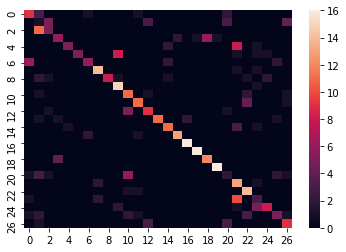

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [17]:
mnb = MultinomialNB()
ms = MinMaxScaler()
mnb.fit(ms.fit_transform(X_train), y_train)
y_pred = mnb.predict(ms.fit_transform(X_test))
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.5661252900232019


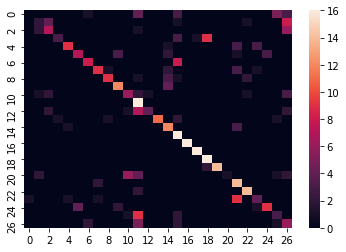

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.5452436194895591


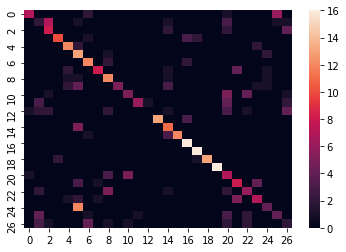

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [21]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

[20:24:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.5243619489559165


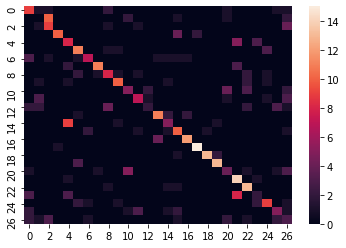

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [23]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.679814385150812


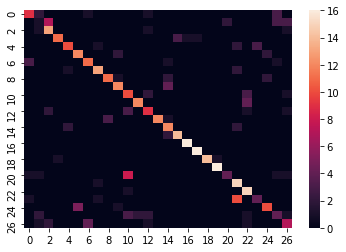

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.39675174013921116


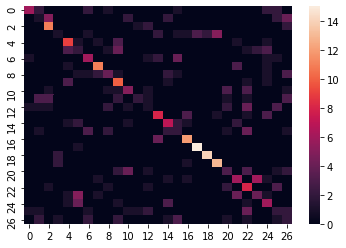

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [27]:
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.5777262180974478


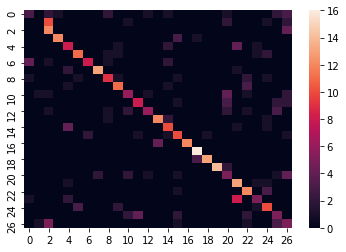

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred))

* We have successfully implemented skeleton based action recognition using data preprocessing techniques for feature extraction by converting all the d_skel data stored in the .mat files into 1-D array and finally building a classification models using machine learning techniques